**Input stock ticker**

In [1]:
ticker = 'RECLTD'  #Change this to your desired stock ticker symbol

**Web scrape code**

In [2]:
#Imports
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#URL Construction
url = f'https://www.screener.in/company/{ticker}/consolidated/'

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9",
}

html_text = requests.get(url, headers=headers, verify=False).text

c:\Users\37079\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.screener.in'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
#Starting bs4 instance
soup = BeautifulSoup(html_text, 'html.parser')

In [5]:
#Extracting months
section = soup.find("section", id="profit-loss")
table = section.find("table", class_="data-table")
months = table.find_all("th")

month_list = []

for month in months:
    month_text = month.text.strip()

    if month_text != '' and month_text != 'TTM':
        month_list.append(month_text)

print(month_list)

['Mar 2014', 'Mar 2015', 'Mar 2016', 'Mar 2017', 'Mar 2018', 'Mar 2019', 'Mar 2020', 'Mar 2021', 'Mar 2022', 'Mar 2023', 'Mar 2024', 'Mar 2025']


In [6]:
#Extracting revenue
rows = table.find_all("tr")

for row in rows:
    button = row.find("button")
    if button and "Sales" in button.text:
        sales_row = row
        break

revs = sales_row.find_all("td")[1:]

rev_list = []
for rev in revs:
    rev_values = rev.text.strip().replace(',', '')

    if rev_values == '':
        None
    else:
        rev_values = int(rev_values)

    rev_list.append(rev_values)

rev_list = rev_list[:-1]

print(rev_list)


[17223, 20544, 24125, 24338, 22658, 25408, 29942, 35556, 39276, 39486, 47517, 56369]


In [7]:
#Extracting profit
for row in rows:
    button = row.find("button")
    if button and "Net Profit" in button.text:
        profit_row = row
        break

profits = profit_row.find_all("td")[1:]

profit_list = []
for profit in profits:
    profit_values = profit.text.strip().replace(',', '')

    if profit_values == '':
        None
    else:
        profit_values = int(profit_values)

    profit_list.append(profit_values)

profit_list = profit_list[:-1]

print(profit_list)

[4741, 5344, 5691, 6313, 4451, 5741, 4972, 8378, 10036, 11167, 14145, 15884]


**Visualizing P&L**

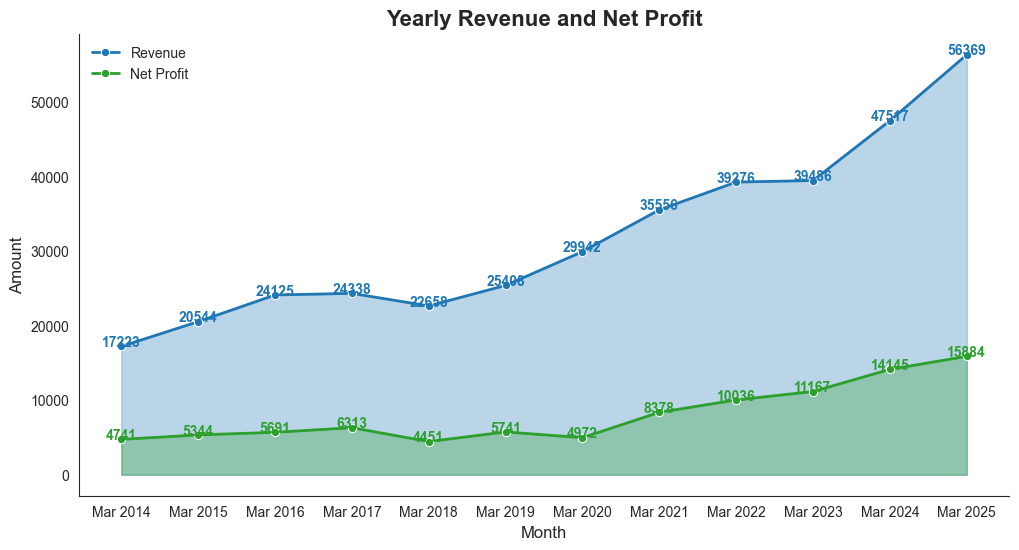

In [8]:
#Creating dataframe and plotting
data = pd.DataFrame({
    'Month': month_list,
    'Revenue': rev_list,
    'Profit': profit_list
})

data["Month"] = pd.Categorical(data["Month"], categories=data["Month"], ordered=True)
sns.set_style("white")
plt.figure(figsize=(12, 6))

sns.lineplot(x="Month", y="Revenue", data=data, marker="o", color="#1f77b4", linewidth=2, label="Revenue")
plt.fill_between(data["Month"], data["Revenue"], color="#1f77b4", alpha=0.3)

sns.lineplot(x="Month", y="Profit", data=data, marker="o", color="#2ca02c", linewidth=2, label="Net Profit")
plt.fill_between(data["Month"], data["Profit"], color="#2ca02c", alpha=0.3)

for i, row in data.iterrows():
    plt.text(row['Month'], row['Revenue'] + 10, f"{row['Revenue']}", ha='center', color="#1f77b4", fontweight='bold')
    plt.text(row['Month'], row['Profit'] + 5, f"{row['Profit']}", ha='center', color="#2ca02c", fontweight='bold')


plt.title("Yearly Revenue and Net Profit", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend(frameon=False)

sns.despine(left=False, bottom=False)

plt.show()